#### In the workbook below, we conducted data cleaning, merged various datasets and did extensive EDA on our data, along with PCA for dimensionality reduction. We also created a number of regression models, with a focus on predicting forward credit growth and credit quality

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor



from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline


In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv('data/FRB_monthly_debt_bals.csv')

In [3]:
df.tail()

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted","Commercial bank interest rate on credit card plans, all accounts; not seasonally adjusted","Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted"
972,2023-08,-3.65,15.92,-10.35,4967955.59,1287912.61,3680042.98,4949641.73,3415.36,2064611.04,...,12.17,21.19,22.77,NaN,NaN,NaN,NaN,ND,ND,ND
973,2023-09,2.45,4.02,1.9,4978098.2,1292228.39,3685869.81,4960665.86,3591.38,2064949.43,...,ND,ND,ND,NaN,NaN,NaN,NaN,65.39,6.73,38587.53
974,2023-10,1.72,2.84,1.33,4985242.91,1295284.52,3689958.39,4964114.27,3591.38,2063463.1,...,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,2023-11,5.65,16.61,1.8,5008723.24,1313216.67,3695506.57,5002177.52,3591.38,2098222.35,...,12.35,21.47,22.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,2023-12,0.37,0.95,0.17,"5,010,283.93",1314257.94,3696025.99,5010283.93,3591.38,2097653.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Series Description',
       'Percent change of total consumer credit, seasonally adjusted at an annual rate',
       'Percent change of total revolving consumer credit, seasonally adjusted at an annual rate',
       'Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate',
       'Total consumer credit owned and securitized, seasonally adjusted level',
       'Revolving consumer credit owned and securitized, seasonally adjusted level',
       'Nonrevolving consumer credit owned and securitized, seasonally adjusted level',
       'Total consumer credit owned and securitized, not seasonally adjusted level',
       'Total securitized consumer credit, not seasonally adjusted level',
       'Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level',
       ...
       'Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted',
       'Commercial bank interest rate on cr

In [5]:
df['Total consumer credit owned and securitized, not seasonally adjusted level'] = pd.to_numeric(df['Total consumer credit owned and securitized, not seasonally adjusted level'], errors='coerce')

In [6]:
df['credit_12m_ago'] = df['Total consumer credit owned and securitized, not seasonally adjusted level'].shift(12)
df['credit_yoy'] = (df['Total consumer credit owned and securitized, not seasonally adjusted level'] - df['credit_12m_ago']) / df['credit_12m_ago']

In [7]:
df.tail(15)

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
962,2022-10,8.83,14.34,7.06,4842165.47,1185503.87,3656661.6,4821036.84,2518.58,1977623.68,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4474332.59,0.077487
963,2022-11,8.15,15.77,5.67,4875038.31,1201084.07,3673954.24,4868492.58,2748.75,2010182.07,...,20.4,NaN,NaN,NaN,NaN,ND,ND,ND,4515454.30,0.078184
964,2022-12,4.68,11.51,2.44,4894041.43,1212609.01,3681432.42,4894041.43,2973.88,2032822.9,...,ND,NaN,NaN,NaN,NaN,67.2,6.07,39407.02,4548536.16,0.075960
965,2023-01,5.42,10.3,3.81,4916136.59,1223019.11,3693117.48,4897785.77,2994.48,2013636.82,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4547714.49,0.076977
966,2023-02,2.69,3.3,2.49,4927157.05,1226382.86,3700774.19,4882667.81,3001.59,1999903.08,...,20.92,NaN,NaN,NaN,NaN,ND,ND,ND,4553256.79,0.072346
967,2023-03,4.57,13.42,1.64,4945936.43,1240096.61,3705839.82,4886478.59,3009.13,2002494.19,...,ND,NaN,NaN,NaN,NaN,66.27,6.41,39066.36,4576955.00,0.067627
968,2023-04,3.49,13.06,0.29,4960313.58,1253588.47,3706725.11,4903337.06,3010.03,2019226.57,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4607786.69,0.064142
969,2023-05,-0.21,7.58,-2.84,4959445.4,1261508.31,3697937.09,4917233.74,3010.61,2031660.95,...,22.16,NaN,NaN,NaN,NaN,ND,ND,ND,4649301.95,0.057628
970,2023-06,2.94,-0.99,4.29,4971610.2,1260463.51,3711146.69,4940746.08,3020.46,2037004.51,...,ND,NaN,NaN,NaN,NaN,65.37,6.6,38689.2,4694075.74,0.052549
971,2023-07,2.78,10.08,0.3,4983110.63,1271047.38,3712063.25,4945792.07,3213.27,2039933.26,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4714302.19,0.049104


In [8]:
 df = df.rename({'Series Description': 'Date'}, axis=1)

In [9]:
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
0,Unit:,Percent,Percent,Percent,Currency,Currency,Currency,NaN,Currency,Currency,...,Percent,Percent,Months,Percent,Currency,Months,Percent,Currency,NaN,NaN
1,Multiplier:,1,1,1,1000000,1000000,1000000,1000000.0,1000000,1000000,...,1,1,1,1,1,1,1,1,NaN,NaN
2,Currency:,USD,USD,USD,USD,USD,USD,NaN,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,NaN,NaN
3,Unique Identifier:,G19/CCOUT/DTCTL_@%A_BA.M,G19/CCOUT/DTCTLR_@%A_BA.M,G19/CCOUT/DTCTLN_@%A_BA.M,G19/CCOUT/DTCTL.M,G19/CCOUT/DTCTLR.M,G19/CCOUT/DTCTLN.M,NaN,G19/CCOUT/DTCNL_N.M,G19/CCOUT/DTCTLHD_N.M,...,G19/TERMS/RIFSPBCICCI_N.M,G19/TERMS/H0.RIFLPCFAN_N.M,G19/TERMS/H0.DTCTLVNM_N.M,G19/TERMS/H0.DTCTLVNL_N.M,G19/TERMS/H0.DTCTLVNA_N.M,G19/TERMS/DTCTLVENM_N.M,G19/TERMS/RIELPCFAN_N.M,G19/TERMS/DTCTLVENA_N.M,NaN,NaN
4,Time Period,DTCTL_@%A_BA.M,DTCTLR_@%A_BA.M,DTCTLN_@%A_BA.M,DTCTL.M,DTCTLR.M,DTCTLN.M,NaN,DTCNL_N.M,DTCTLHD_N.M,...,RIFSPBCICCI_N.M,H0.RIFLPCFAN_N.M,H0.DTCTLVNM_N.M,H0.DTCTLVNL_N.M,H0.DTCTLVNA_N.M,DTCTLVENM_N.M,RIELPCFAN_N.M,DTCTLVENA_N.M,NaN,NaN


In [10]:
df=df[5:]
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(972, 121)

In [12]:
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_bls = pd.read_csv('data/BLS_data.csv')
df_bls.head()

,Unnamed: 0,year,periodName,CPI,CPI_yoy,Unemployment,NF Employment,NF Employment_yoy,ULC,ULC_yoy,...,Food,Food_yoy,Gasoline,Gasoline_yoy,Imports,Imports_yoy,New & Used Vehicles,New & Used Vehicles_yoy,All Items Less Food & Shelter,All Items Less Food & Shelter_yoy
0,0,2023,December,306.746,3.352123,3.7,157347.0,1.980673,NaN,NaN,...,325.409,2.704844,3.289,-1.996424,139.5,-1.622003,127.596,0.080004,270.725,2.184670
1,1,2023,November,307.051,3.137271,3.7,157014.0,1.854627,NaN,NaN,...,325.172,2.949119,3.500,-9.161692,139.5,-1.483051,127.908,-0.096070,270.202,2.107125
2,2,2023,October,307.671,3.241145,3.8,156832.0,1.907120,NaN,NaN,...,325.731,3.300742,3.782,-5.826693,140.2,-1.751927,126.772,-1.819984,269.779,2.020913
3,3,2023,September,307.789,3.699698,3.8,156667.0,2.039261,NaN,NaN,...,324.704,3.692255,3.988,2.757021,141.0,-1.467505,127.343,-1.915582,269.390,1.930855
4,4,2023,August,307.026,3.665112,3.8,156421.0,2.048525,NaN,NaN,...,324.100,4.254121,3.955,-3.560107,140.3,-2.973721,128.323,-0.803172,269.199,2.318519


In [ ]:
#Loading Aaran's full dataset to combine with credit yoy from df
#df_first = pd.read_csv('data/all_monthly_data_clean.csv')
#df_first.head()

In [ ]:
#df_first['date'] = pd.to_datetime(df_first['month']+' '+df_first['year'].astype(str))

#df_first.set_index('date', inplace=True)
#df_first.sort_index(inplace=True)




In [ ]:
#df_first.head()

In [ ]:
#df.head()

In [ ]:
#df.reset_index(inplace=True, drop = True)
#df.head()

In [ ]:
#df = df[684:]
#df.head()

In [ ]:
#df.reset_index(inplace=True)
#df.head()

In [ ]:
#df = df.drop(columns = 'index')
#df.head()

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index(df['Date'], inplace=True)
#df.head()

In [ ]:
#df = df.drop(columns = 'Date')
#df.head()

In [ ]:
#df_first.head()

In [ ]:
#plt.figure(figsize=(10, 6)) 
#plt.title('Credit Year-Over-Year')
#plt.xlabel('Year')
#plt.ylabel('Credit YoY Change')
#plt.plot(df['credit_yoy'])


#plt.show()


In [ ]:
#df_first.head()

In [ ]:
#Combining credit with original Aaran's df
#df_first['credit_yoy'] = df['credit_yoy']


In [ ]:
#df_first.info()

In [ ]:
#removing 2001
#df_first_cut = df_first[12:]

In [ ]:
#plt.plot(df_first_cut['shelter_yoy'])
#plt.plot(df_first_cut['credit_yoy'])
#plt.show()


In [ ]:
#df_first_cut.head()

In [ ]:
#multiplyhing credit by 100
#df_first_cut['credit_yoy'] = 100* df_first_cut['credit_yoy']

In [ ]:
#df_first_cut.head()

In [ ]:
#df_first_cut.to_csv('data/Master_data.csv')

In [14]:
df_first_cut = pd.read_csv('data/Master_data.csv')

In [15]:
df_first_cut.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,...,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,credit_yoy_6m,credit_yoy_12m
0,0,0,0,2003-01-01,2003,January,289412000.0,5.8,NaN,2.597403,...,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,5.195193,5.379730
1,1,1,1,2003-02-01,2003,February,289606000.0,5.9,NaN,2.980877,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.255735,5.124623
2,2,2,2,2003-03-01,2003,March,289809000.0,5.9,NaN,3.020134,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.537326,5.396815
3,3,3,3,2003-04-01,2003,April,290024000.0,6.0,NaN,2.224694,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.566037,4.830131
4,4,4,4,2003-05-01,2003,May,290250000.0,6.1,NaN,2.057842,...,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,5.167455,4.545574


In [16]:
df_first_cut['date'] = pd.to_datetime(df_first_cut['date'])

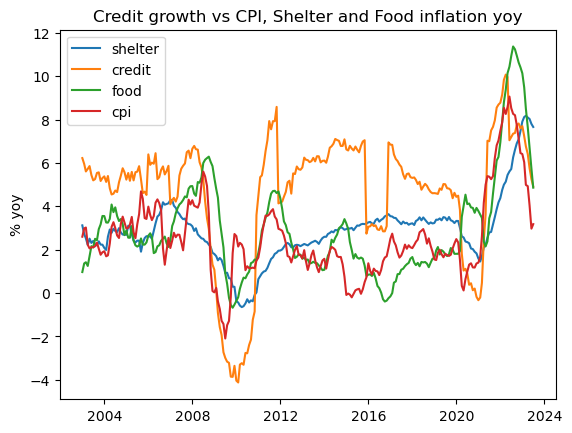

In [388]:
plt.plot(df_first_cut['date'], df_first_cut['shelter_yoy'], label = 'shelter')
plt.plot(df_first_cut['date'], df_first_cut['credit_yoy'], label = 'credit')
plt.plot(df_first_cut['date'], df_first_cut['food_yoy'], label = 'food')
plt.plot(df_first_cut['date'], df_first_cut['cpi_yoy'], label = 'cpi')

plt.title('Credit growth vs CPI, Shelter and Food inflation yoy')
plt.ylabel('% yoy')
plt.legend(loc='upper left')

plt.savefig('images/credit_vs_cpi.png')

plt.show()

#### We can see that credit growth is well correlated to inflation from initial EDA

In [18]:
df_first_cut.corr()['credit_yoy'].sort_values(ascending=False)

credit_yoy                        1.000000
credit_yoy_6m                     0.674375
shelter_yoy                       0.587798
cpi_yoy                           0.515323
cc_bals_30d_due_percentage_12m    0.473923
                                    ...   
HE Revolving                     -0.360207
HE Revolving_x                   -0.360207
HE Revolving_y                   -0.360207
unemployment_insurance           -0.379517
unemployment_rate                -0.576700
Name: credit_yoy, Length: 90, dtype: float64

#### Below we look at unemployment, savings rate and credit growth over time 

Text(0.5, 0, 'Credit growth % yoy')

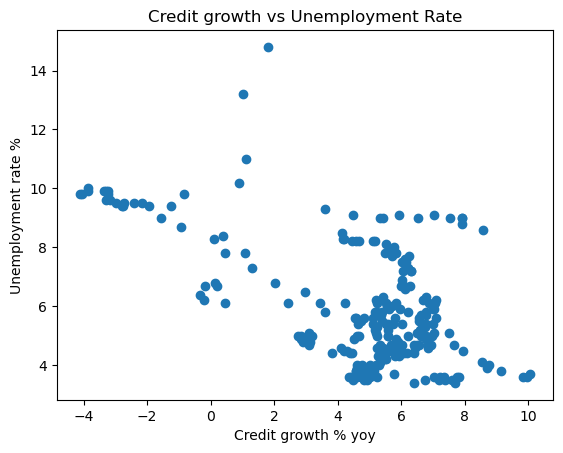

In [20]:
plt.scatter(df_first_cut['credit_yoy'], df_first_cut['unemployment_rate'])

plt.title('Credit growth vs Unemployment Rate')
plt.ylabel('Unemployment rate %')
plt.xlabel('Credit growth % yoy')

Text(0.5, 0, 'Credit growth % yoy')

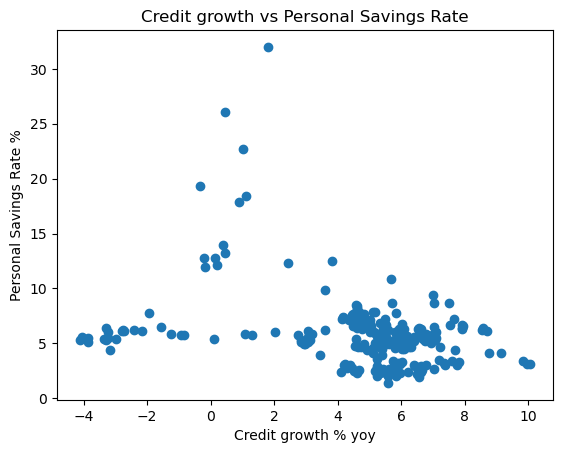

In [21]:
plt.scatter(df_first_cut['credit_yoy'], df_first_cut['personal_saving_as_a_percentage_of_disposable_personal_income'])

plt.title('Credit growth vs Personal Savings Rate')
plt.ylabel('Personal Savings Rate %')
plt.xlabel('Credit growth % yoy')

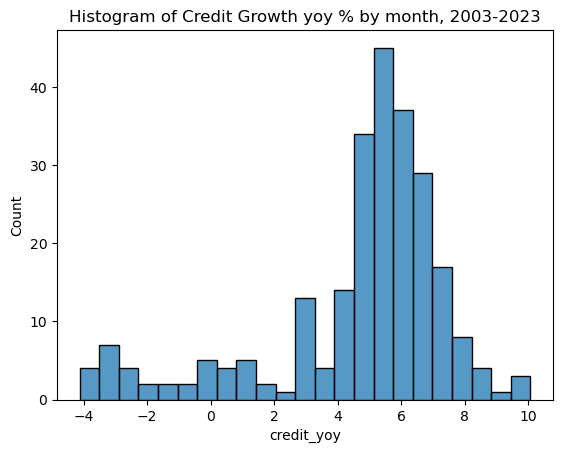

In [389]:
sns.histplot(df_first_cut['credit_yoy'])
plt.title('Histogram of Credit Growth yoy % by month, 2003-2023')
plt.savefig('images/credit_hist.png')

Text(0.5, 1.0, 'Histogram of Personal Savings Rate % by month, 2003-2023')

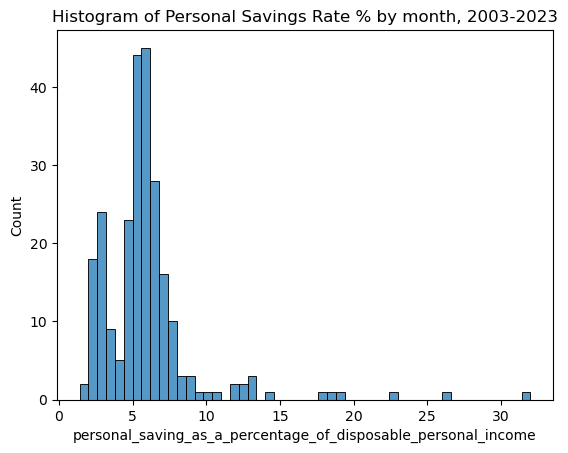

In [23]:
sns.histplot(df_first_cut['personal_saving_as_a_percentage_of_disposable_personal_income'])
plt.title('Histogram of Personal Savings Rate % by month, 2003-2023')

In [24]:
#First 50 entries for hourly earnings are NaN so using CPI as a proxy. This is a reasonable estimate as inflation was fairly low over the period
df_first_cut['hourly_earnings_yoy'][0:51] = df_first_cut['cpi_yoy'][0:51]
df_first_cut['hourly_earnings_yoy']

/var/folders/2x/dbnt23xd6xv5bzc9snn0s0tm0000gn/T/ipykernel_78681/3726047071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_cut['hourly_earnings_yoy'][0:51] = df_first_cut['cpi_yoy'][0:51]


0      2.597403
1      2.980877
2      3.020134
3      2.224694
4      2.057842
         ...   
242    4.616834
243    4.663537
244    4.551122
245    4.658385
246    4.670585
Name: hourly_earnings_yoy, Length: 247, dtype: float64

In [25]:
df_first_cut.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'date', 'year', 'month',
       'population', 'unemployment_rate', 'hourly_earnings_yoy', 'cpi_yoy',
       'shelter_yoy', 'energy_yoy', 'medical_care_yoy', 'food_yoy',
       'gasoline_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy',
       'all_less_food_&_shelter_yoy', 'total_personal_income',
       'total_employee_compensation', 'wages_and_salaries_all',
       'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_

In [26]:
features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'credit_yoy', 'unemployment_rate']
    

In [27]:
df1 = df_first_cut[features]

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


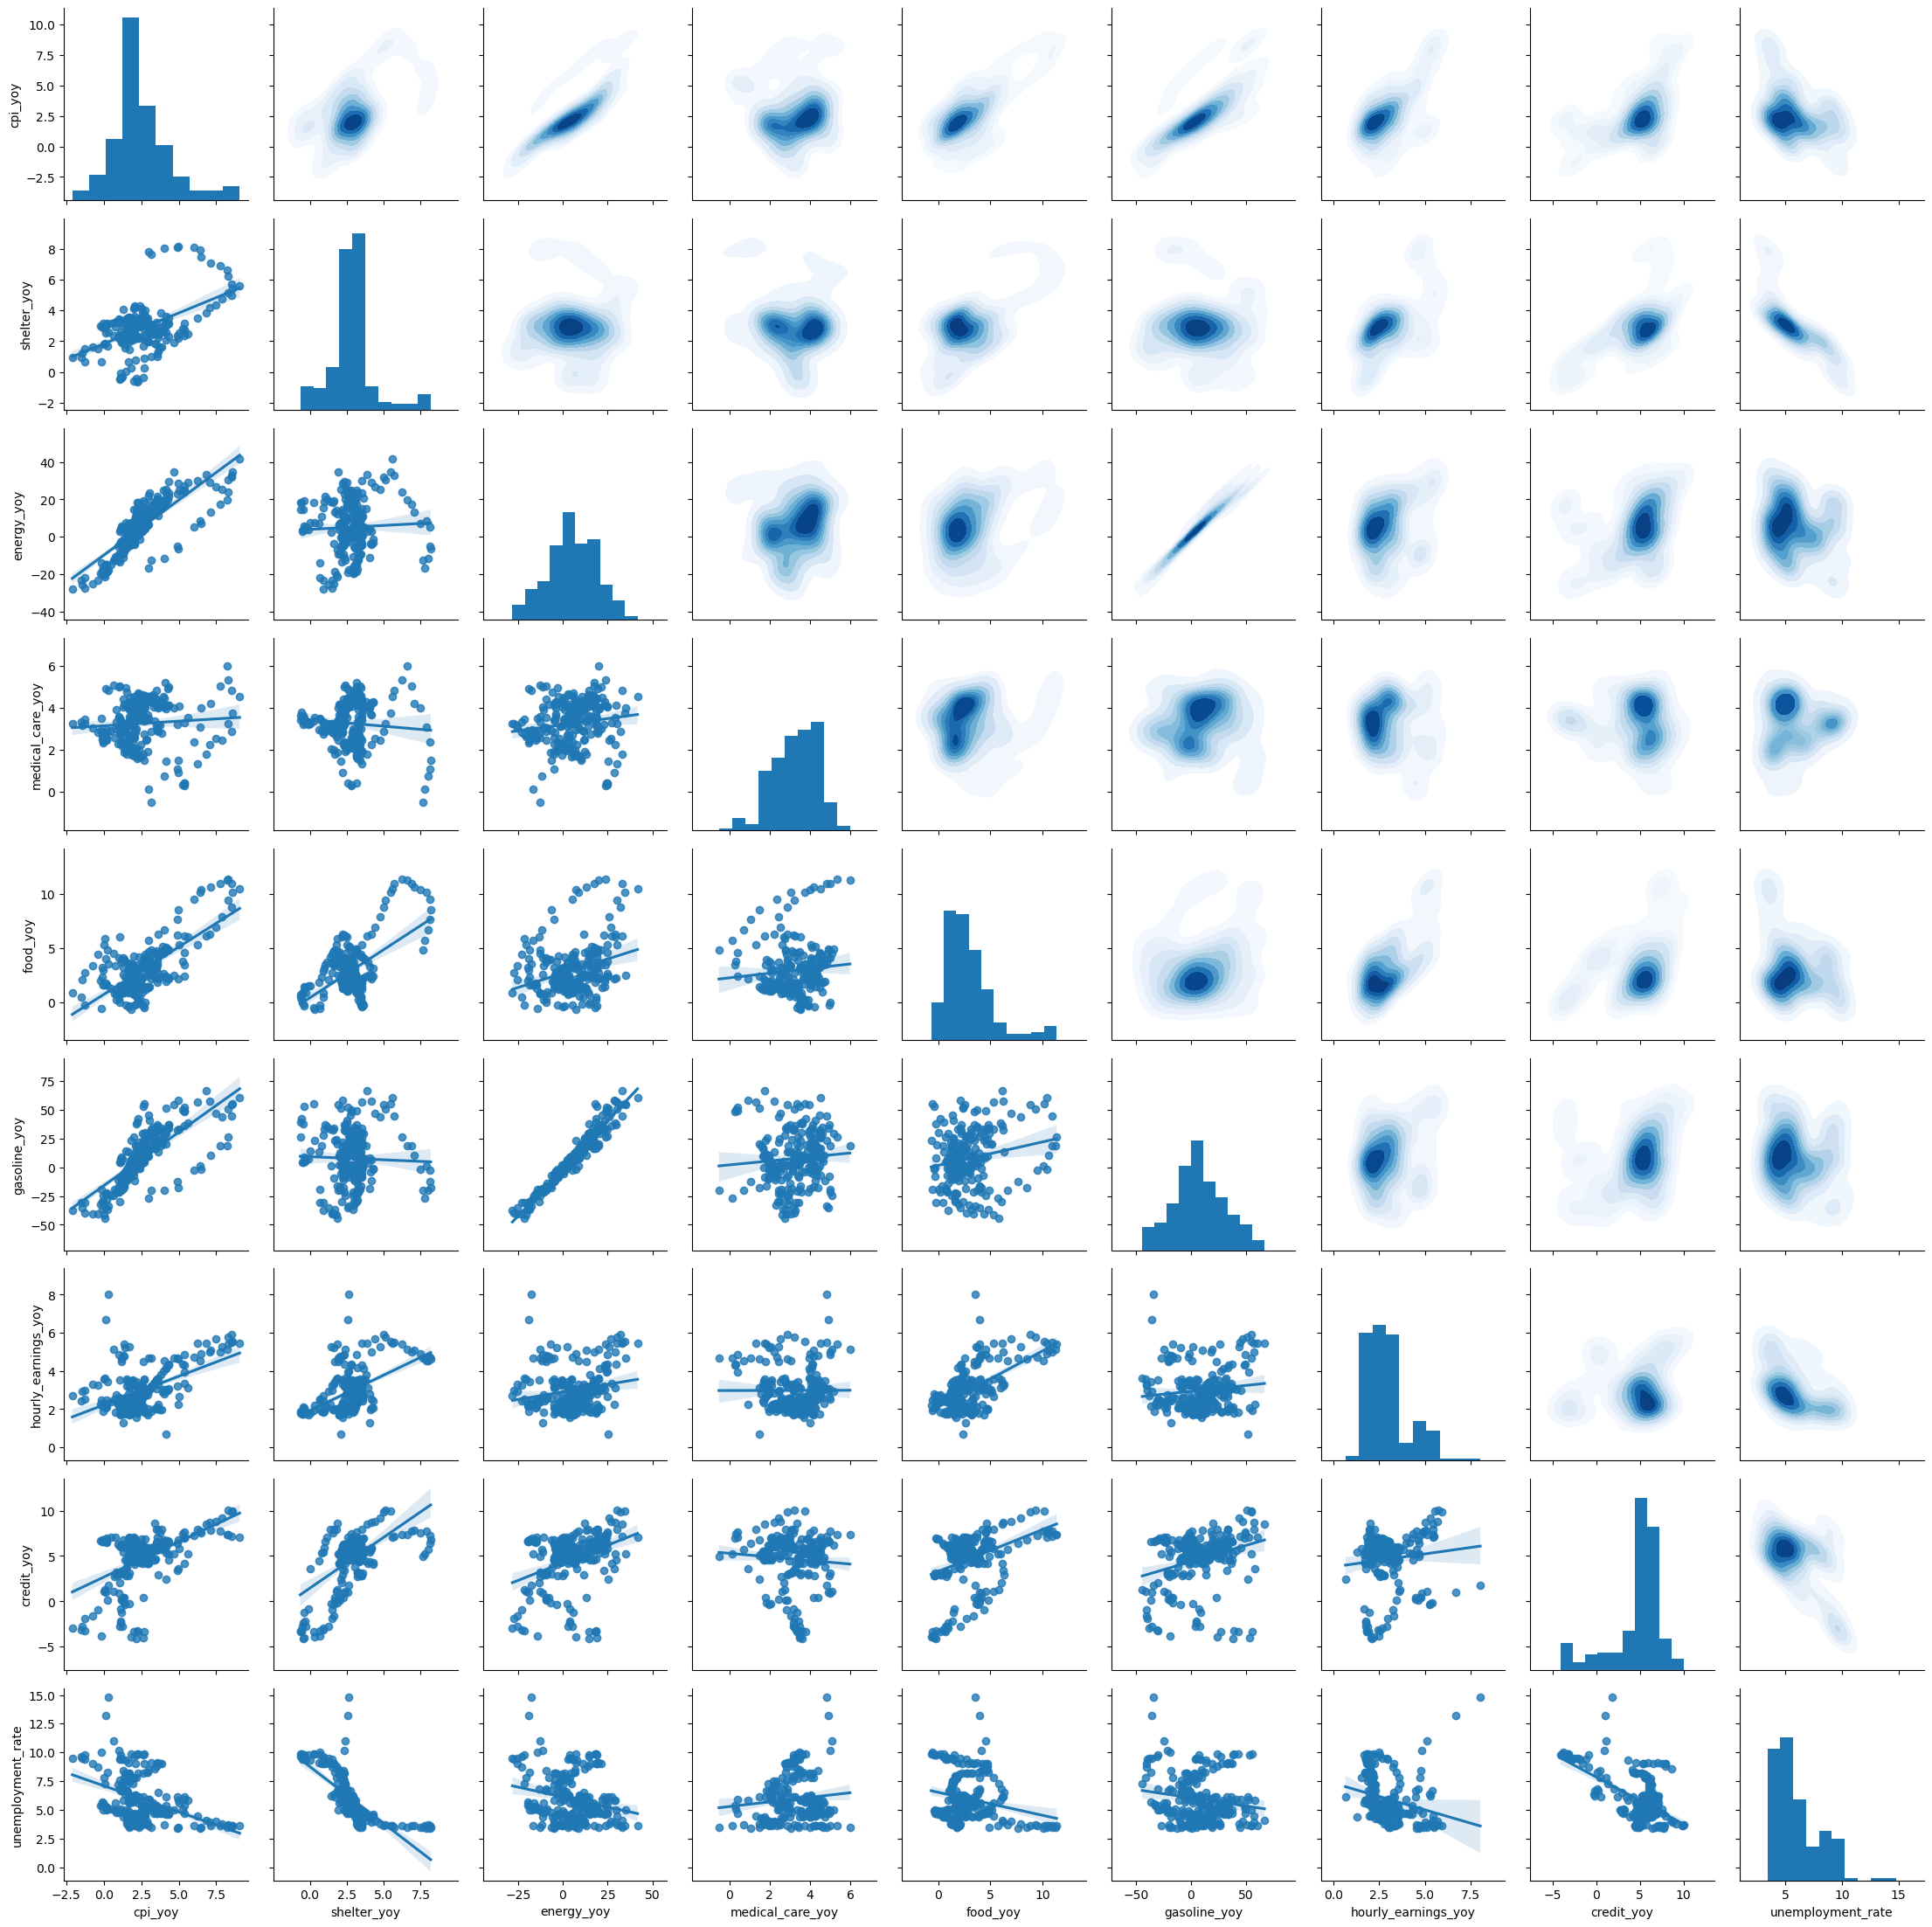

In [29]:
g = sns.PairGrid(df1)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

import warnings
warnings.filterwarnings('ignore');

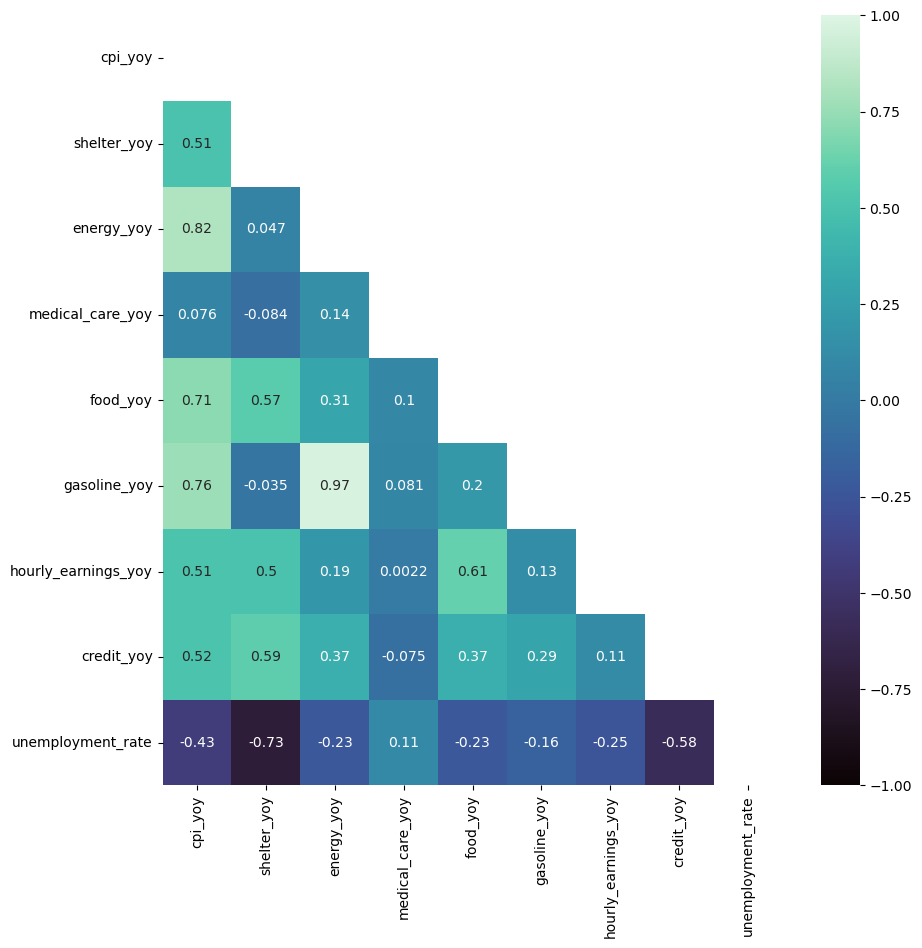

In [390]:
import numpy as np

plt.figure(figsize=(10,10))

corr = df1.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, annot = True, fmt='.2g', cmap = 'mako', vmax =1, vmin = -1 )

plt.savefig('images/correl_chart.png')

#### In the above tables, we can see that credit growth correaltes well with inflation and wage growth (though less so) and is very negatively correlated with unemployment. Also using the above to check for collinearity. Removing energy given high correlation with gasoline

In [31]:
df_first_cut.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,...,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,credit_yoy_6m,credit_yoy_12m
0,0,0,0,2003-01-01,2003,January,289412000.0,5.8,2.597403,2.597403,...,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,5.195193,5.379730
1,1,1,1,2003-02-01,2003,February,289606000.0,5.9,2.980877,2.980877,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.255735,5.124623
2,2,2,2,2003-03-01,2003,March,289809000.0,5.9,3.020134,3.020134,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.537326,5.396815
3,3,3,3,2003-04-01,2003,April,290024000.0,6.0,2.224694,2.224694,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.566037,4.830131
4,4,4,4,2003-05-01,2003,May,290250000.0,6.1,2.057842,2.057842,...,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,5.167455,4.545574


#### Below we begin to build our first regression models

In [32]:
df_first_cut.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'date', 'year', 'month',
       'population', 'unemployment_rate', 'hourly_earnings_yoy', 'cpi_yoy',
       'shelter_yoy', 'energy_yoy', 'medical_care_yoy', 'food_yoy',
       'gasoline_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy',
       'all_less_food_&_shelter_yoy', 'total_personal_income',
       'total_employee_compensation', 'wages_and_salaries_all',
       'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_

In [33]:
features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate']


X = df_first_cut[features]
y = df_first_cut['credit_yoy']


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cpi_yoy              247 non-null    float64
 1   shelter_yoy          247 non-null    float64
 2   medical_care_yoy     247 non-null    float64
 3   food_yoy             247 non-null    float64
 4   gasoline_yoy         247 non-null    float64
 5   hourly_earnings_yoy  247 non-null    float64
 6   unemployment_rate    247 non-null    float64
dtypes: float64(7)
memory usage: 13.6 KB


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [37]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.5017359153406104

In [38]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.5014090623089829

In [39]:
#RF
pipe_rf = Pipeline([
    
    ('rf', RandomForestRegressor())
])

pipe_rf_params = {'rf__n_estimators' : [50, 75, 100],
               'rf__max_depth' : [5,7,10],
               'rf__min_samples_leaf' : [3, 5, 8],
               'rf__min_samples_split' : [5, 7, 10]
                      }

gs_rf = GridSearchCV(pipe_rf, 
                  param_grid=pipe_rf_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1)

gs_rf.fit(X_train, y_train)

gs_rf_model = gs_rf.best_estimator_
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [40]:
cross_val_score(gs_rf_model, X_train, y_train, cv =5).mean()

0.8449010749230629

In [41]:
#SVR
from sklearn.svm import SVR
pipe_svr = Pipeline([
    
    ('svr', SVR())
])

pipe_svr_params = {
               'svr__kernel': ['rbf'],
               'svr__C': [10, 1, 0.1],
               'svr__gamma': [0.1, 1, 10]
                      }

gs_svr = GridSearchCV(pipe_svr, 
                  param_grid=pipe_svr_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1) 

gs_svr.fit(X_train, y_train)

gs_svr_model = gs_svr.best_estimator_
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [42]:
cross_val_score(gs_svr_model, X_train, y_train, cv =5).mean()

0.8936800923083122

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8516034898878084

In [44]:
#Feature importances for RF
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [45]:
feature_imp.sort_values(ascending=False)

unemployment_rate      0.624751
cpi_yoy                0.097095
hourly_earnings_yoy    0.080766
shelter_yoy            0.070789
gasoline_yoy           0.060397
food_yoy               0.039871
medical_care_yoy       0.026330
dtype: float64

#### Now adding debt balances to our features

In [46]:
#Working with debt bals
debt_bals = pd.read_csv('data/NYFED_Debt_Bals.csv')

In [49]:
debt_bals.head()


,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
def convert_to_datetime(qtr_date):
    qtr_date_str = str(qtr_date)
    yr, qtr = qtr_date.split(':')
    year = '20' + yr
    quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
    month = quarter_to_month[qtr]
    return pd.to_datetime(f'{year}-{month}-01').date()

In [51]:
debt_bals = debt_bals[:83]
features = ['Qtr', 'Mortgage', 'HE Revolving', 'Auto Loan', 'Credit Card',
       'Student Loan', 'Other', 'Total']
debt_bals = debt_bals[features]

In [52]:
debt_bals

,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551
3,03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655
4,04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893
...,...,...,...,...,...,...,...,...
78,22:Q3,11.669,0.322,1.524,0.925,1.5740,0.4910,16.5050
79,22:Q4,11.923,0.336,1.552,0.986,1.5950,0.5070,16.8990
80,23:Q1,12.044,0.339,1.562,0.986,1.6040,0.5120,17.0470
81,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630


In [53]:
convert_to_datetime('23:Q2')

datetime.date(2023, 4, 1)

In [54]:
debt_bals['date'] = debt_bals['Qtr'].apply(convert_to_datetime)

In [55]:
debt_bals.head()

,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,date
0,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,2003-01-01
1,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,2003-04-01
2,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,2003-07-01
3,03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655,2003-10-01
4,04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893,2004-01-01


In [56]:
debt_bals_1 = debt_bals.copy()

In [57]:
debt_bals_1['date'] = pd.to_datetime(debt_bals_1['date']).dt.to_period('M')

In [58]:
debt_bals_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   Qtr           83 non-null     object   
 1   Mortgage      83 non-null     float64  
 2   HE Revolving  83 non-null     float64  
 3   Auto Loan     83 non-null     float64  
 4   Credit Card   83 non-null     float64  
 5   Student Loan  83 non-null     float64  
 6   Other         83 non-null     float64  
 7   Total         83 non-null     float64  
 8   date          83 non-null     period[M]
dtypes: float64(7), object(1), period[M](1)
memory usage: 6.0+ KB


In [59]:
debt_bals_1.set_index('date', inplace=True)

In [60]:
debt_bals_1 = debt_bals_1.resample('M').bfill().reset_index()

In [61]:
debt_bals_1.head()

,date,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,2003-01,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,2003-02,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,2003-03,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
3,2003-04,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
4,2003-05,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551


In [62]:
df_first_cut.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 95 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Unnamed: 0.2                                                     247 non-null    int64         
 1   Unnamed: 0.1                                                     247 non-null    int64         
 2   Unnamed: 0                                                       247 non-null    int64         
 3   date                                                             247 non-null    datetime64[ns]
 4   year                                                             247 non-null    int64         
 5   month                                                            247 non-null    object        
 6   population                                                       247 non-null    f

In [63]:
df_first_cut_1 = df_first_cut.copy()

In [64]:
df_first_cut_1['date'] = pd.to_datetime(df_first_cut_1['date']).dt.to_period('M')

In [65]:
df_first_cut_1

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,...,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,credit_yoy_6m,credit_yoy_12m
0,0,0,0,2003-01,2003,January,289412000.0,5.8,2.597403,2.597403,...,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,5.195193,5.379730
1,1,1,1,2003-02,2003,February,289606000.0,5.9,2.980877,2.980877,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.255735,5.124623
2,2,2,2,2003-03,2003,March,289809000.0,5.9,3.020134,3.020134,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.537326,5.396815
3,3,3,3,2003-04,2003,April,290024000.0,6.0,2.224694,2.224694,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.566037,4.830131
4,4,4,4,2003-05,2003,May,290250000.0,6.1,2.057842,2.057842,...,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,5.167455,4.545574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,242,242,2023-03,2023,March,334664000.0,3.5,4.616834,4.984974,...,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630,NaN,NaN
243,243,243,243,2023-04,2023,April,334792000.0,3.4,4.663537,4.930320,...,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630,NaN,NaN
244,244,244,244,2023-05,2023,May,334929000.0,3.7,4.551122,4.047609,...,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910,NaN,NaN
245,245,245,245,2023-06,2023,June,335080000.0,3.6,4.658385,2.969178,...,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910,NaN,NaN


In [77]:
merged_df = df_first_cut_1
merged_df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,...,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,credit_yoy_6m,credit_yoy_12m
0,0,0,0,2003-01,2003,January,289412000.0,5.8,2.597403,2.597403,...,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,5.195193,5.379730
1,1,1,1,2003-02,2003,February,289606000.0,5.9,2.980877,2.980877,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.255735,5.124623
2,2,2,2,2003-03,2003,March,289809000.0,5.9,3.020134,3.020134,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.537326,5.396815
3,3,3,3,2003-04,2003,April,290024000.0,6.0,2.224694,2.224694,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.566037,4.830131
4,4,4,4,2003-05,2003,May,290250000.0,6.1,2.057842,2.057842,...,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,5.167455,4.545574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,242,242,2023-03,2023,March,334664000.0,3.5,4.616834,4.984974,...,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630,NaN,NaN
243,243,243,243,2023-04,2023,April,334792000.0,3.4,4.663537,4.930320,...,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630,NaN,NaN
244,244,244,244,2023-05,2023,May,334929000.0,3.7,4.551122,4.047609,...,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910,NaN,NaN
245,245,245,245,2023-06,2023,June,335080000.0,3.6,4.658385,2.969178,...,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910,NaN,NaN


In [68]:
#merged_df.to_csv('df_with_debt.csv')

In [78]:
merged_df['cc_balance_total_billions'] = merged_df['cc_balance_total_billions'].interpolate(method='linear')
merged_df['cc_bals_30d_due_percentage'] = merged_df['cc_bals_30d_due_percentage'].interpolate(method='linear')
merged_df['cc_bals_90d_due_percentage'] = merged_df['cc_bals_90d_due_percentage'].interpolate(method='linear')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 95 columns):
 #   Column                                                           Non-Null Count  Dtype    
---  ------                                                           --------------  -----    
 0   Unnamed: 0.2                                                     247 non-null    int64    
 1   Unnamed: 0.1                                                     247 non-null    int64    
 2   Unnamed: 0                                                       247 non-null    int64    
 3   date                                                             247 non-null    period[M]
 4   year                                                             247 non-null    int64    
 5   month                                                            247 non-null    object   
 6   population                                                       247 non-null    float64  
 7   unemployment_rate         

In [79]:

merged_df['Mortgage']

0       4.942
1       5.080
2       5.080
3       5.080
4       5.183
        ...  
242    12.014
243    12.014
244    12.140
245    12.140
246    12.140
Name: Mortgage, Length: 247, dtype: float64

#### Building new mortgage servicing cost feature

In [80]:
merged_df['Mortgage_servicing'] = merged_df['mortgage_rate_30_yr'] * merged_df['Mortgage']

In [82]:
merged_df.set_index('date')

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,...,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,credit_yoy_6m,credit_yoy_12m
date,,,,,,,,,,,,,,,,,,,,,
2003-01,0,0,0,2003,January,289412000.0,5.8,2.597403,2.597403,3.120429,...,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,5.195193,5.379730
2003-02,1,1,1,2003,February,289606000.0,5.9,2.980877,2.980877,2.718447,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.255735,5.124623
2003-03,2,2,2,2003,March,289809000.0,5.9,3.020134,3.020134,2.520601,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.537326,5.396815
2003-04,3,3,3,2003,April,290024000.0,6.0,2.224694,2.224694,2.222222,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.566037,4.830131
2003-05,4,4,4,2003,May,290250000.0,6.1,2.057842,2.057842,2.507232,...,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,5.167455,4.545574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03,242,242,242,2023,March,334664000.0,3.5,4.616834,4.984974,8.175182,...,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630,NaN,NaN
2023-04,243,243,243,2023,April,334792000.0,3.4,4.663537,4.930320,8.095818,...,23:Q2,12.014,0.340,1.582,1.031,1.5690,0.5270,17.0630,NaN,NaN
2023-05,244,244,244,2023,May,334929000.0,3.7,4.551122,4.047609,8.026785,...,23:Q3,12.140,0.349,1.595,1.079,1.5990,0.5290,17.2910,NaN,NaN


In [83]:
#Need to convert to datetime to chart with it
merged_df['date'] = merged_df['date'].dt.to_timestamp()


Text(0, 0.5, '$ bns')

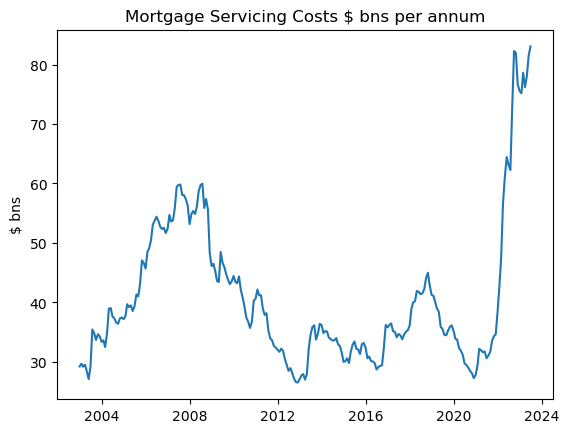

In [84]:
plt.plot(merged_df['date'],merged_df['Mortgage_servicing'])

plt.title('Mortgage Servicing Costs $ bns per annum')
plt.ylabel('$ bns')

#### Now adding credit card data

In [85]:
merged_df['cc_rate_all_ns']

0            NaN
1      12.260000
2      12.213333
3      12.166667
4      12.120000
         ...    
242    20.340000
243    20.590000
244    20.840000
245    20.840000
246    20.840000
Name: cc_rate_all_ns, Length: 247, dtype: float64

In [86]:
#coerce makes all errors NaN
merged_df['cc_rate_all_ns'] = pd.to_numeric(merged_df['cc_rate_all_ns'], errors='coerce')
merged_df['cc_rate_all_ns']

0            NaN
1      12.260000
2      12.213333
3      12.166667
4      12.120000
         ...    
242    20.340000
243    20.590000
244    20.840000
245    20.840000
246    20.840000
Name: cc_rate_all_ns, Length: 247, dtype: float64

In [87]:
merged_df['cc_rate_all_ns'] = merged_df['cc_rate_all_ns'].interpolate(method='linear')
merged_df['cc_rate_all_ns']

0            NaN
1      12.260000
2      12.213333
3      12.166667
4      12.120000
         ...    
242    20.340000
243    20.590000
244    20.840000
245    20.840000
246    20.840000
Name: cc_rate_all_ns, Length: 247, dtype: float64

In [88]:
merged_df['cc_payments'] = merged_df['Credit Card'] * merged_df['cc_rate_all_ns']
merged_df['cc_payments']

0           NaN
1       8.49618
2       8.46384
3       8.43150
4       8.39916
         ...   
242    20.97054
243    21.22829
244    22.48636
245    22.48636
246    22.48636
Name: cc_payments, Length: 247, dtype: float64

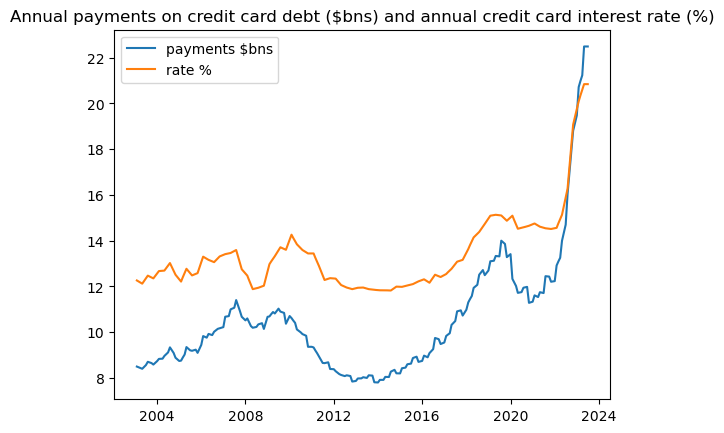

In [391]:
plt.plot(merged_df['date'],merged_df['cc_payments'], label = 'payments $bns')
plt.plot(merged_df['date'],merged_df['cc_rate_all_ns'], label = 'rate %') 

plt.title('Annual payments on credit card debt ($bns) and annual credit card interest rate (%)')

plt.legend(loc='upper left')

plt.savefig('images/credit_card_servicing.png')

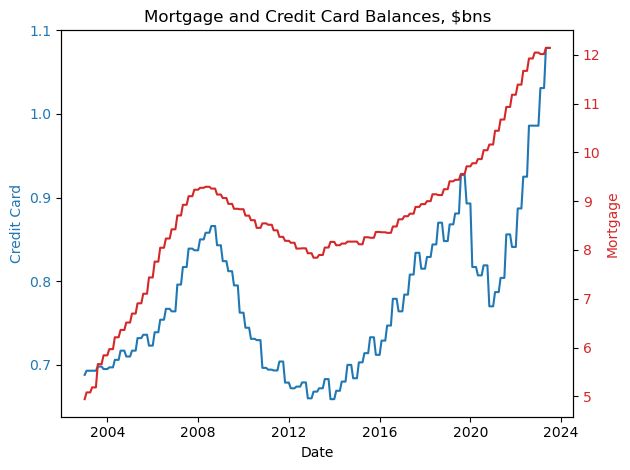

In [427]:


fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Credit Card', color=color)
ax1.plot(merged_df['date'], merged_df['Credit Card'], color=color, label = 'Credit Card')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mortgage', color=color)  
ax2.plot(merged_df['date'], merged_df['Mortgage'], color=color, label = 'Mortgage')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Mortgage and Credit Card Balances, $bns')



fig.tight_layout() 
plt.show()

#plt.savefig('images/credit_mortgage_bals.png')

### Adding mortgage servicing and credit card servicing costs to the model

In [110]:
merged_df['cc_payments_yoy'] = 100*(merged_df['cc_payments'] - merged_df['cc_payments'].shift(12)) / merged_df['cc_payments'].shift(12)

In [111]:
merged_df['cc_payments_yoy'] = merged_df['cc_payments_yoy'].fillna(0)

In [112]:
merged_df['cc_payments_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    60.285403
243    60.191989
244    60.671371
245    56.734870
246    52.986648
Name: cc_payments_yoy, Length: 247, dtype: float64

In [113]:
merged_df['Mortgage_servicing_yoy'] = 100*(merged_df['Mortgage_servicing'] - merged_df['Mortgage_servicing'].shift(12)) / merged_df['Mortgage_servicing'].shift(12)

In [114]:
merged_df['Mortgage_servicing_yoy'] = merged_df['Mortgage_servicing_yoy'].fillna(0)

In [115]:
merged_df['Mortgage_servicing_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    65.492112
243    34.304782
244    27.807544
245    26.494016
246    31.475018
Name: Mortgage_servicing_yoy, Length: 247, dtype: float64

In [178]:
#Adding mortgage costs and credit card service costs

features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']

X = merged_df[features]
y = merged_df['credit_yoy']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [181]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.6979039900718842

In [182]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.6990760020842706

In [183]:
#RF
pipe_rf = Pipeline([
    
    ('rf', RandomForestRegressor())
])

pipe_rf_params = {'rf__n_estimators' : [50, 75, 100],
               'rf__max_depth' : [5,7,10],
               'rf__min_samples_leaf' : [3, 5, 8],
               'rf__min_samples_split' : [5, 7, 10]
                      }

gs_rf = GridSearchCV(pipe_rf, 
                  param_grid=pipe_rf_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1)

gs_rf.fit(X_train, y_train)

gs_rf_model = gs_rf.best_estimator_
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [184]:
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

0.8505009657441283

In [185]:
gs_rf.best_params_

{'rf__max_depth': 7,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 50}

In [186]:
#Looking for overfitting

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=50)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=50)

In [187]:
rf.score(X_train, y_train)

0.961885226041686

In [188]:
rf.score(X_test, y_test)

0.8112946437150595

In [189]:
#SVR
from sklearn.svm import SVR
pipe_svr = Pipeline([
    
    ('svr', SVR())
])

pipe_svr_params = {
               'svr__kernel': ['rbf'],
               'svr__C': [10, 1, 0.1],
               'svr__gamma': [0.1, 1, 10]
                      }

gs_svr = GridSearchCV(pipe_svr, 
                  param_grid=pipe_svr_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1) 

gs_svr.fit(X_train, y_train)

gs_svr_model = gs_svr.best_estimator_
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [190]:
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

0.897656033644745

In [191]:
gs_svr.best_params_

{'svr__C': 10, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}

In [192]:
from sklearn.svm import SVR
svr = SVR(C = 10, gamma = 0.1, kernel='rbf')
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [193]:
svr.score(X_train, y_train)

0.9634115011684518

In [194]:
svr.score(X_test, y_test)

0.8889926876862958

### Looking at feature importance under RF model

In [195]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [196]:
feature_imp.sort_values(ascending=False)

unemployment_rate         0.641252
cpi_yoy                   0.087993
shelter_yoy               0.064643
hourly_earnings_yoy       0.060766
Mortgage_servicing_yoy    0.039899
gasoline_yoy              0.037816
food_yoy                  0.028885
medical_care_yoy          0.021141
cc_payments_yoy           0.017604
dtype: float64

### Now adding 30 and 90 day delinquencies as a target variable

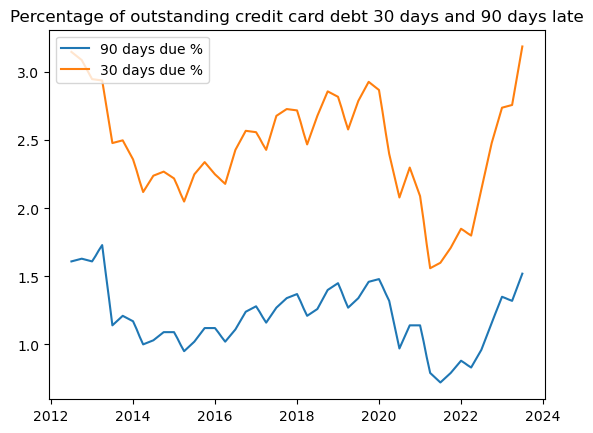

In [393]:

plt.plot(merged_df['date'],merged_df['cc_bals_90d_due_percentage'], label = '90 days due %')
plt.plot(merged_df['date'],merged_df['cc_bals_30d_due_percentage'], label = '30 days due %') 

plt.title('Percentage of outstanding credit card debt 30 days and 90 days late')

plt.legend(loc='upper left')

plt.savefig('images/credit_30_90.png')

In [199]:
merged_df['cc_bals_30d_due_percentage_yoy'] = 100*(merged_df['cc_bals_30d_due_percentage'] - merged_df['cc_bals_30d_due_percentage'].shift(12)) / merged_df['cc_bals_30d_due_percentage'].shift(12)
merged_df['cc_bals_30d_due_percentage_yoy'] = merged_df['cc_bals_30d_due_percentage_yoy'].fillna(0)
merged_df['cc_bals_30d_due_percentage_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    51.559633
243    53.333333
244    51.742160
245    50.328947
246    49.065421
Name: cc_bals_30d_due_percentage_yoy, Length: 247, dtype: float64

In [200]:
merged_df['cc_bals_90d_due_percentage_yoy'] = 100*(merged_df['cc_bals_90d_due_percentage'] - merged_df['cc_bals_90d_due_percentage'].shift(12)) / merged_df['cc_bals_30d_due_percentage'].shift(12)
merged_df['cc_bals_90d_due_percentage_yoy'] = merged_df['cc_bals_90d_due_percentage_yoy'].fillna(0)
merged_df['cc_bals_90d_due_percentage_yoy']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
242    26.605505
243    27.222222
244    26.829268
245    26.480263
246    26.168224
Name: cc_bals_90d_due_percentage_yoy, Length: 247, dtype: float64

### Now building this into the model as a target variable

In [202]:
#Now trying to predict 30d delinquent

#Adding mortgage costs and credit card service costs


features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']


X = merged_df[features]
y = merged_df['cc_bals_30d_due_percentage_yoy']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [205]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.6397930683534168

In [206]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.6401497378483907

In [207]:
#RF
pipe_rf = Pipeline([
    
    ('rf', RandomForestRegressor())
])

pipe_rf_params = {'rf__n_estimators' : [50, 75, 100],
               'rf__max_depth' : [5,7,10],
               'rf__min_samples_leaf' : [3, 5, 8],
               'rf__min_samples_split' : [5, 7, 10]
                      }

gs_rf = GridSearchCV(pipe_rf, 
                  param_grid=pipe_rf_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1)

gs_rf.fit(X_train, y_train)

gs_rf_model = gs_rf.best_estimator_
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [208]:
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

0.8220893199915469

In [210]:
#SVR
from sklearn.svm import SVR
pipe_svr = Pipeline([
    
    ('svr', SVR())
])

pipe_svr_params = {
               'svr__kernel': ['rbf'],
               'svr__C': [10, 1, 0.1],
               'svr__gamma': [0.1, 1, 10]
                      }

gs_svr = GridSearchCV(pipe_svr, 
                  param_grid=pipe_svr_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1) 

gs_svr.fit(X_train, y_train)

gs_svr_model = gs_svr.best_estimator_
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [211]:
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

0.6904433085934233

In [212]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9412047518718948

In [213]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8563232365146082

In [214]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [215]:
feature_imp.sort_values(ascending=False)

cc_payments_yoy           0.304121
shelter_yoy               0.264865
hourly_earnings_yoy       0.166698
medical_care_yoy          0.094256
Mortgage_servicing_yoy    0.060639
food_yoy                  0.051730
unemployment_rate         0.029568
gasoline_yoy              0.014393
cpi_yoy                   0.013728
dtype: float64

#### Given we had the best resuilts from RF and SVR, we will use these models to predict deilnquencies and credit growth 6 and 12 months ahead.

In [216]:
#Now predicting 6m ahead
merged_df['cc_bals_30d_due_percentage_yoy_6m'] = merged_df['cc_bals_30d_due_percentage_yoy'].shift(-6)
merged_df['cc_bals_30d_due_percentage_6m'] = merged_df['cc_bals_30d_due_percentage'].shift(-6)

merged_df[['cc_bals_30d_due_percentage_6m', 'cc_bals_30d_due_percentage']][-10:]

,cc_bals_30d_due_percentage_6m,cc_bals_30d_due_percentage
237,2.760000,2.480000
238,2.903333,2.566667
239,3.046667,2.653333
240,3.190000,2.740000
241,NaN,2.746667
242,NaN,2.753333
243,NaN,2.760000
244,NaN,2.903333
245,NaN,3.046667
246,NaN,3.190000


In [218]:
features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']

X = merged_df[108:241][features]
y = merged_df[108:241]['cc_bals_30d_due_percentage_6m']

In [219]:
merged_df[108:241]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,...,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,credit_yoy_6m,credit_yoy_12m
108,108,108,108,2012-01-01,2012,January,313636000.0,8.3,1.706037,2.925217,...,12:Q1,8.187,0.6118,0.7365,0.6788,0.903656,0.3185,11.436256,4.583906,5.791267
109,109,109,109,2012-02-01,2012,February,313811000.0,8.3,1.792742,2.871099,...,12:Q2,8.147,0.5890,0.7500,0.6720,0.914000,0.3120,11.384000,5.518289,6.244546
110,110,110,110,2012-03-01,2012,March,313993000.0,8.2,2.142545,2.651398,...,12:Q2,8.147,0.5890,0.7500,0.6720,0.914000,0.3120,11.384000,5.487353,6.146785
111,111,111,111,2012-04-01,2012,April,314176000.0,8.2,2.095155,2.302740,...,12:Q2,8.147,0.5890,0.7500,0.6720,0.914000,0.3120,11.384000,5.835689,6.128141
112,112,112,112,2012-05-01,2012,May,314368000.0,8.2,1.827676,1.704254,...,12:Q3,8.028,0.5730,0.7680,0.6740,0.956000,0.3110,11.310000,5.709178,6.036749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,236,236,236,2022-09-01,2022,September,333925000.0,3.5,5.137318,8.201670,...,22:Q4,11.923,0.3360,1.5520,0.9860,1.595000,0.5070,16.899000,6.762653,NaN
237,237,237,237,2022-10-01,2022,October,334071000.0,3.6,4.975923,7.745427,...,22:Q4,11.923,0.3360,1.5520,0.9860,1.595000,0.5070,16.899000,6.414150,NaN
238,238,238,238,2022-11-01,2022,November,334206000.0,3.6,5.089629,7.110323,...,23:Q1,12.044,0.3390,1.5620,0.9860,1.604000,0.5120,17.047000,5.762839,NaN
239,239,239,239,2022-12-01,2022,December,334326000.0,3.5,4.904459,6.454401,...,23:Q1,12.044,0.3390,1.5620,0.9860,1.604000,0.5120,17.047000,5.254929,NaN


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [222]:
#RF
pipe_rf = Pipeline([
    
    ('rf', RandomForestRegressor())
])

pipe_rf_params = {'rf__n_estimators' : [50, 75, 100],
               'rf__max_depth' : [5,7,10],
               'rf__min_samples_leaf' : [3, 5, 8],
               'rf__min_samples_split' : [5, 7, 10]
                      }

gs_rf = GridSearchCV(pipe_rf, 
                  param_grid=pipe_rf_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1)

gs_rf.fit(X_train, y_train)

gs_rf_model = gs_rf.best_estimator_
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')



Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [223]:
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

0.7700799826642528

In [224]:
#SVR
from sklearn.svm import SVR
pipe_svr = Pipeline([
    
    ('svr', SVR())
])

pipe_svr_params = {
               'svr__kernel': ['rbf','poly', 'linear'],
               'svr__C': [10, 1, 0.1],
               'svr__gamma': [0.1, 1, 10]
                      }

gs_svr = GridSearchCV(pipe_svr, 
                  param_grid=pipe_svr_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1) 

gs_svr.fit(X_train, y_train)

gs_svr_model = gs_svr.best_estimator_
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [225]:
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

0.9198797396553815

#### Now let's try for 12 months ahead

In [226]:
#Doing for 12m
merged_df['cc_bals_30d_due_percentage_yoy_12m'] = merged_df['cc_bals_30d_due_percentage_yoy'].shift(-12)
merged_df['cc_bals_30d_due_percentage_12m'] = merged_df['cc_bals_30d_due_percentage'].shift(-12)

merged_df[['cc_bals_30d_due_percentage_12m', 'cc_bals_30d_due_percentage']][-16:]

,cc_bals_30d_due_percentage_12m,cc_bals_30d_due_percentage
231,2.760000,1.800000
232,2.903333,1.913333
233,3.046667,2.026667
234,3.190000,2.140000
235,NaN,2.253333
236,NaN,2.366667
237,NaN,2.480000
238,NaN,2.566667
239,NaN,2.653333
240,NaN,2.740000


In [394]:
features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']

X = merged_df[108:235][features]
y = merged_df[108:235]['cc_bals_30d_due_percentage_12m']

In [395]:
merged_df[108:235]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,...,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,credit_yoy_6m,credit_yoy_12m
108,108,108,108,2012-01-01,2012,January,313636000.0,8.3,1.706037,2.925217,...,12:Q1,8.187,0.6118,0.7365,0.6788,0.903656,0.3185,11.436256,4.583906,5.791267
109,109,109,109,2012-02-01,2012,February,313811000.0,8.3,1.792742,2.871099,...,12:Q2,8.147,0.5890,0.7500,0.6720,0.914000,0.3120,11.384000,5.518289,6.244546
110,110,110,110,2012-03-01,2012,March,313993000.0,8.2,2.142545,2.651398,...,12:Q2,8.147,0.5890,0.7500,0.6720,0.914000,0.3120,11.384000,5.487353,6.146785
111,111,111,111,2012-04-01,2012,April,314176000.0,8.2,2.095155,2.302740,...,12:Q2,8.147,0.5890,0.7500,0.6720,0.914000,0.3120,11.384000,5.835689,6.128141
112,112,112,112,2012-05-01,2012,May,314368000.0,8.2,1.827676,1.704254,...,12:Q3,8.028,0.5730,0.7680,0.6740,0.956000,0.3110,11.310000,5.709178,6.036749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,230,230,230,2022-03-01,2022,March,333067000.0,3.6,5.921490,8.542456,...,22:Q2,11.387,0.3190,1.5020,0.8870,1.589000,0.4700,16.154000,7.381099,6.762653
231,231,231,231,2022-04-01,2022,April,333191000.0,3.7,5.759682,8.258629,...,22:Q2,11.387,0.3190,1.5020,0.8870,1.589000,0.4700,16.154000,7.748737,6.414150
232,232,232,232,2022-05-01,2022,May,333317000.0,3.6,5.561040,8.581512,...,22:Q3,11.669,0.3220,1.5240,0.9250,1.574000,0.4910,16.505000,7.818444,5.762839
233,233,233,233,2022-06-01,2022,June,333451000.0,3.6,5.435494,9.059758,...,22:Q3,11.669,0.3220,1.5240,0.9250,1.574000,0.4910,16.505000,7.595966,5.254929


In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [397]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [398]:
pipe1= Pipeline([
    ('lasso', Lasso())
])

pipe1_params = {
               'lasso__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  cv=5,
                  verbose=1)

gs_lr.fit(X_train, y_train)

gs_lr_model = gs_lr.best_estimator_

cross_val_score(gs_lr_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.5720846799150645

In [399]:
pipe2= Pipeline([
    ('ridge', Ridge())
])

pipe2_params = {
               'ridge__alpha': [0.01, 0.1, 1, 10, 100]
                }

gs_lr2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params,
                  cv=5,
                  verbose=1)

gs_lr2.fit(X_train, y_train)

gs_lr2_model = gs_lr2.best_estimator_

cross_val_score(gs_lr2_model, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.5694378869726547

In [400]:
#RF
pipe_rf = Pipeline([
    
    ('rf', RandomForestRegressor())
])

pipe_rf_params = {'rf__n_estimators' : [50, 75, 100],
               'rf__max_depth' : [5,7,10],
               'rf__min_samples_leaf' : [3, 5, 8],
               'rf__min_samples_split' : [5, 7, 10]
                      }

gs_rf = GridSearchCV(pipe_rf, 
                  param_grid=pipe_rf_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1)

gs_rf.fit(X_train, y_train)

gs_rf_model = gs_rf.best_estimator_
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [401]:
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

0.7667187981908121

In [402]:
predictions = gs_rf_model.predict(X_test)
rmse = (mean_squared_error(y_test, predictions)**0.5)
rmse

0.1412597086910025

In [403]:
#SVR
from sklearn.svm import SVR
pipe_svr = Pipeline([
    
    ('svr', SVR())
])

pipe_svr_params = {
               'svr__kernel': ['rbf','poly', 'linear'],
               'svr__C': [10, 1, 0.1],
               'svr__gamma': [0.1, 1, 10]
                      }

gs_svr = GridSearchCV(pipe_svr, 
                  param_grid=pipe_svr_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1) 

gs_svr.fit(X_train, y_train)

gs_svr_model = gs_svr.best_estimator_
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [404]:
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

0.860203732015471

In [405]:
predictions = gs_svr_model.predict(X_test)
rmse = (mean_squared_error(y_test, predictions)**0.5)
rmse

0.11326547573216365

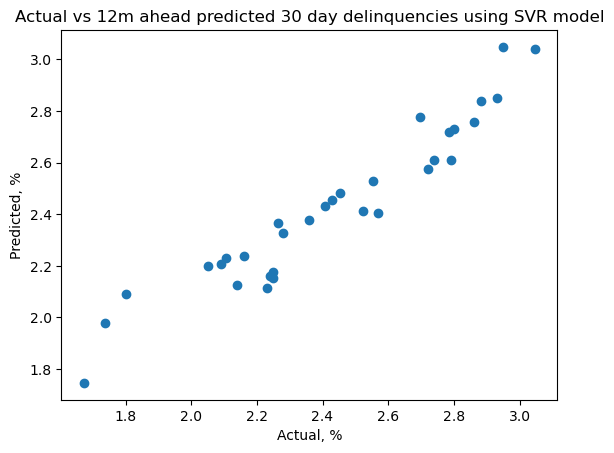

In [406]:
plt.scatter(y_test, predictions)

plt.title('Actual vs 12m ahead predicted 30 day delinquencies using SVR model')
plt.xlabel('Actual, %')
plt.ylabel('Predicted, %')
plt.savefig('images/SVR_12m_30day.png')
           

Text(0.5, 1.0, '30 day delinquencies, %')

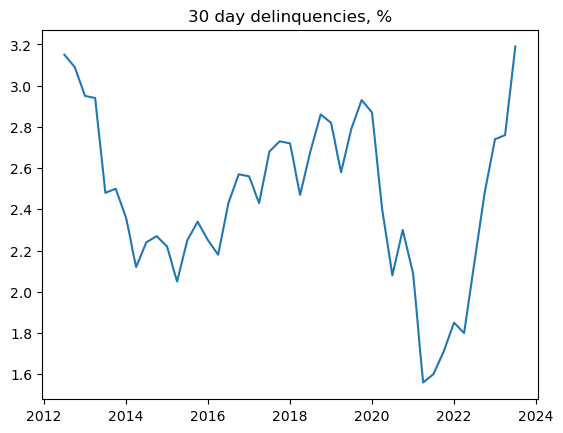

In [301]:
plt.plot(merged_df['date'], merged_df['cc_bals_30d_due_percentage'])
plt.title('30 day delinquencies, %')

In [302]:
#Forecasting 30 day delinquencies in July 2024
pred_july = merged_df[features]
gs_svr_model.predict(pred_july)[0]


2.3452970297263245

#### Forecasting growth and delinquencies is critical for a credit card company looking to restrict credit access into recessions

#### Also the model, as of July 2023, predicts a significant drop in delinquencies

#### Looking at feature importances from the RF model, credit card servicing payments are the major driver

In [303]:
gs_rf.best_params_

{'rf__max_depth': 10,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 75}

In [304]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=50)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=50)

In [305]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [306]:
sorted_feature_importances = feature_imp.sort_values(ascending=False)

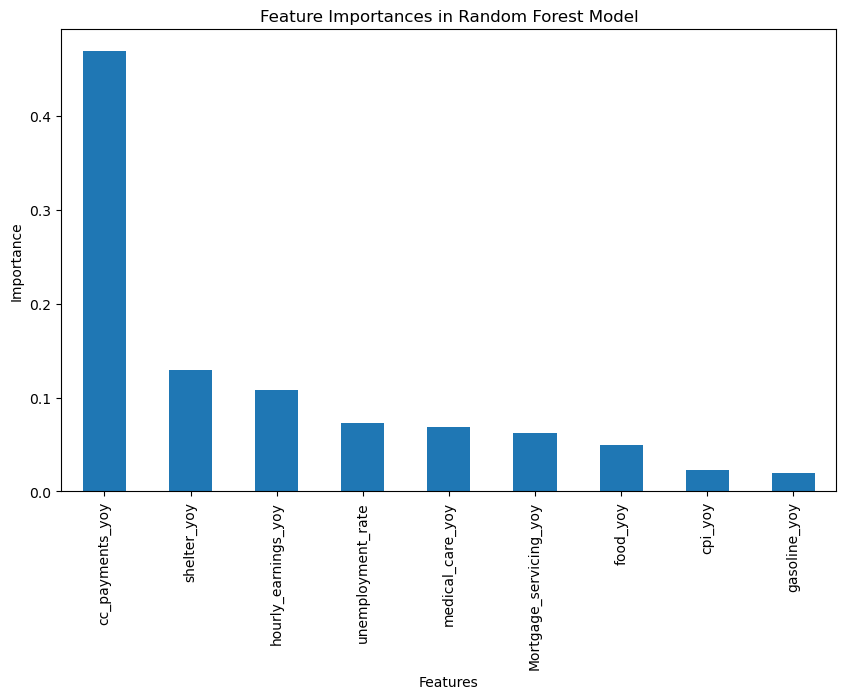

In [307]:
plt.figure(figsize=(10,6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

#### Let's do the same for credit growth 6m and 12m ahead

In [308]:
merged_df['credit_yoy_6m'] = merged_df['credit_yoy'].shift(-6)
merged_df['credit_yoy_12m'] = merged_df['credit_yoy'].shift(-12)

merged_df[['credit_yoy', 'credit_yoy_6m', 'credit_yoy_12m']][-15:]

,credit_yoy,credit_yoy_6m,credit_yoy_12m
232,9.961450,7.818444,5.762839
233,7.045462,7.595966,5.254929
234,7.192072,7.697741,4.910374
235,7.349697,7.234624,NaN
236,7.381099,6.762653,NaN
237,7.748737,6.414150,NaN
238,7.818444,5.762839,NaN
239,7.595966,5.254929,NaN
240,7.697741,4.910374,NaN
241,7.234624,NaN,NaN


In [407]:
features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']

X = merged_df[:240][features]
y = merged_df[:240]['credit_yoy_6m']

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [409]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [410]:
#RF
pipe_rf = Pipeline([
    
    ('rf', RandomForestRegressor())
])

pipe_rf_params = {'rf__n_estimators' : [50, 75, 100],
               'rf__max_depth' : [5,7,10],
               'rf__min_samples_leaf' : [3, 5, 8],
               'rf__min_samples_split' : [5, 7, 10]
                      }

gs_rf = GridSearchCV(pipe_rf, 
                  param_grid=pipe_rf_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1)

gs_rf.fit(X_train, y_train)

gs_rf_model = gs_rf.best_estimator_
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [411]:
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

0.6857856609752548

In [412]:
#SVR
from sklearn.svm import SVR
pipe_svr = Pipeline([
    
    ('svr', SVR())
])

pipe_svr_params = {
               'svr__kernel': ['rbf'],
               'svr__C': [10, 1, 0.1],
               'svr__gamma': [0.1, 1, 10]
                      }

gs_svr = GridSearchCV(pipe_svr, 
                  param_grid=pipe_svr_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1) 

gs_svr.fit(X_train, y_train)

gs_svr_model = gs_svr.best_estimator_
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [413]:
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

0.8222793847521956

#### Now for 12m forward credit growth



In [414]:
features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']

X = merged_df[:234][features]
y = merged_df[:234]['credit_yoy_12m']

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [416]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [417]:
#RF
pipe_rf = Pipeline([
    
    ('rf', RandomForestRegressor())
])

pipe_rf_params = {'rf__n_estimators' : [50, 75, 100],
               'rf__max_depth' : [5,7,10],
               'rf__min_samples_leaf' : [3, 5, 8],
               'rf__min_samples_split' : [5, 7, 10]
                      }

gs_rf = GridSearchCV(pipe_rf, 
                  param_grid=pipe_rf_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1)

gs_rf.fit(X_train, y_train)

gs_rf_model = gs_rf.best_estimator_
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [418]:
cross_val_score(gs_rf_model, X_train, y_train, cv=5).mean()

0.7198727426949253

In [419]:
predictions = gs_rf_model.predict(X_test)
rmse = (mean_squared_error(y_test, predictions)**0.5)
rmse

1.911848092209514

Text(0, 0.5, 'Predicted, %')

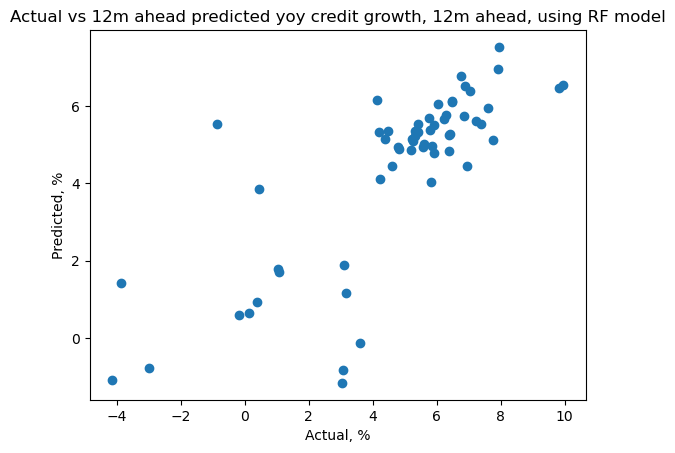

In [420]:
plt.scatter(y_test, predictions)

plt.title('Actual vs 12m ahead predicted yoy credit growth, 12m ahead, using RF model')
plt.xlabel('Actual, %')
plt.ylabel('Predicted, %')

In [421]:
#SVR
from sklearn.svm import SVR
pipe_svr = Pipeline([
    
    ('svr', SVR())
])

pipe_svr_params = {
               'svr__kernel': ['rbf'],
               'svr__C': [10, 1, 0.1],
               'svr__gamma': [0.1, 1, 10]
                      }

gs_svr = GridSearchCV(pipe_svr, 
                  param_grid=pipe_svr_params, 
                  cv=5,
                  verbose=1,
                  n_jobs = -1) 

gs_svr.fit(X_train, y_train)

gs_svr_model = gs_svr.best_estimator_
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

import warnings
warnings.filterwarnings('ignore')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [422]:
cross_val_score(gs_svr_model, X_train, y_train, cv=5).mean()

0.82705907214412

In [423]:
predictions = gs_svr_model.predict(X_test)
rmse = (mean_squared_error(y_test, predictions)**0.5)
rmse

1.3315955896958562

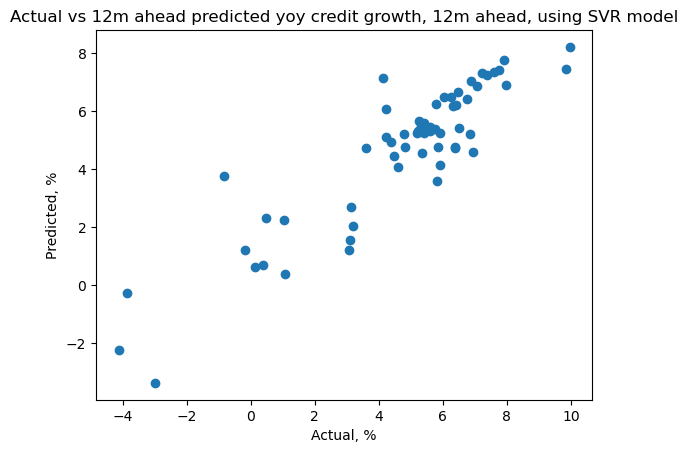

In [424]:
plt.scatter(y_test, predictions)

plt.title('Actual vs 12m ahead predicted yoy credit growth, 12m ahead, using SVR model')
plt.xlabel('Actual, %')
plt.ylabel('Predicted, %')
plt.savefig('images/SVR_yoy_credit.png')

Text(0.5, 1.0, 'Credit growth, yoy %')

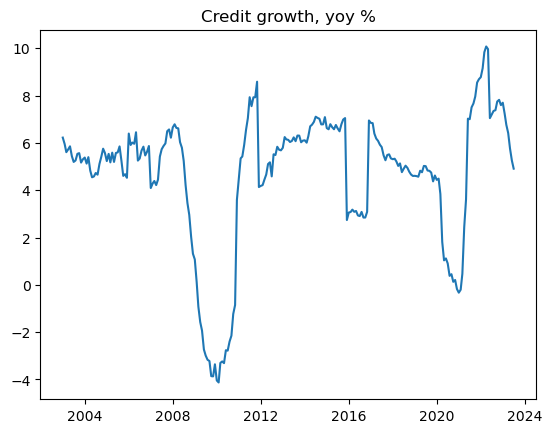

In [384]:
plt.plot(merged_df['date'], merged_df['credit_yoy'])
plt.title('Credit growth, yoy %')

In [383]:
#Forecasting 30 day delinquencies in July 2024
pred_july = merged_df[features]
gs_svr_model.predict(pred_july)[0]

4.312591224017835

In [329]:
gs_rf.best_params_

{'rf__max_depth': 10,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 100}

In [330]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=50)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=50)

In [331]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [332]:
sorted_feature_importances = feature_imp.sort_values(ascending=False)

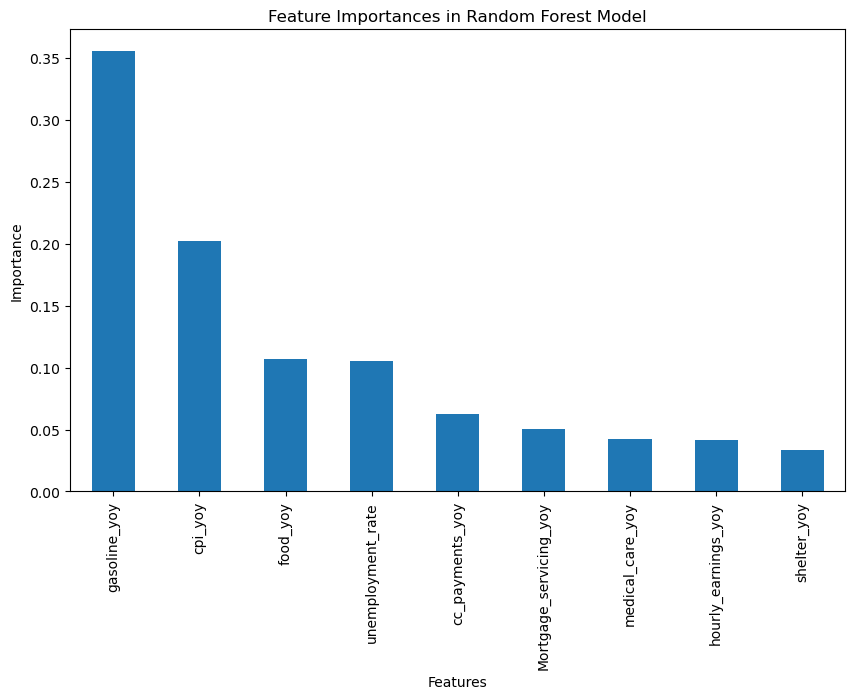

In [333]:
plt.figure(figsize=(10,6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

#### So we can see that the most important features for credit growth appear to be inflation, in particular energy costs, along with interest income and mortgage rates

#### Empirically, the major fluctuations in both credit and energy prices happened in 2008/09, 2015 (oil prices went negative, though credit was not dramatically impacted and 2020-2022, during which time energy prices were down due to COVID and then up significantly due to the Ukraine war. So other than in 2015, energy prices have been very procyclical with boom/bust cycles

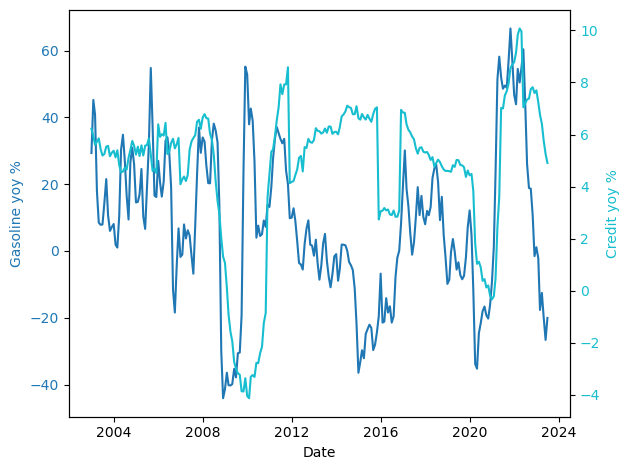

In [334]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Gasoline yoy %', color=color)
ax1.plot(merged_df['date'], merged_df['gasoline_yoy'], color=color, label='gasoline yoy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:cyan'
ax2.set_ylabel('Credit yoy %', color=color)  
ax2.plot(merged_df['date'], merged_df['credit_yoy'], color=color, label ='credit yoy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.show()

#### Doing PCA for dimensionality reduction as we are dealing with limited rows. 

#### First for delinquent credit

In [335]:

from sklearn.decomposition import PCA

In [336]:
features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']

X = merged_df[108:235][features]
y = merged_df[108:235]['cc_bals_30d_due_percentage_12m']

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [338]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [339]:
pca = PCA()

In [340]:
pca.fit(X_train)

PCA()

In [341]:
Z_train = pca.transform(X_train)

In [342]:
pd.DataFrame(Z_train).describe()

,0,1,2,3,4,5,6,7,8
count,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01
mean,2.337312e-17,2.337312e-17,7.011935e-18,6.427607e-18,-3.812740e-17,1.782200e-17,1.869849e-17,1.928282e-17,-7.596263e-18
std,2.079110e+00,1.454333e+00,1.089956e+00,7.621739e-01,6.525796e-01,5.169051e-01,3.618030e-01,2.350640e-01,9.920264e-02
min,-2.900400e+00,-1.479705e+00,-3.078951e+00,-1.630289e+00,-1.744332e+00,-1.268745e+00,-1.143751e+00,-4.402741e-01,-2.718503e-01
25%,-1.249008e+00,-1.136365e+00,-5.415770e-01,-5.167686e-01,-3.220649e-01,-3.338658e-01,-2.026434e-01,-1.899052e-01,-6.182748e-02
50%,-5.082982e-01,-4.389313e-01,-1.836669e-02,4.393794e-02,7.467068e-03,1.293275e-02,3.217923e-02,-2.203349e-02,-6.944034e-03
75%,7.043678e-01,9.206183e-01,6.441529e-01,4.290208e-01,4.493446e-01,2.533858e-01,2.422948e-01,1.405012e-01,6.284984e-02
max,7.573603e+00,4.831378e+00,3.134427e+00,1.815444e+00,1.755252e+00,1.965103e+00,1.166581e+00,8.584479e-01,2.856987e-01


In [343]:
Z_test = pca.transform(X_test)

In [344]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 30 components): {np.round(var_exp[:30], 3)}')

Explained variance (first 30 components): [0.475 0.233 0.131 0.064 0.047 0.029 0.014 0.006 0.001]


In [346]:
df_pca = pd.DataFrame(Z_train)

In [347]:
#df_pca.to_csv('data/pca.csv')

In [348]:
#Checking correlations are effectively 0
df_pca.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000e+00,-2.249902e-16,-4.899183e-16,-3.439715e-16,4.219604e-16,4.681700e-16,4.197617e-16,1.442757e-15,3.036423e-15
1,-2.249902e-16,1.000000e+00,4.053298e-16,6.920600e-16,-4.317249e-17,-7.588483e-16,-5.948294e-16,2.107475e-16,8.391108e-17
2,-4.899183e-16,4.053298e-16,1.000000e+00,5.587426e-16,-7.753936e-16,-6.917934e-17,2.250016e-16,5.105415e-16,-3.712524e-15
3,-3.439715e-16,6.920600e-16,5.587426e-16,1.000000e+00,-4.828336e-16,-6.752775e-16,2.907140e-16,5.939323e-16,-7.659105e-16
4,4.219604e-16,-4.317249e-17,-7.753936e-16,-4.828336e-16,1.000000e+00,2.974378e-16,2.352910e-16,-5.042613e-16,4.587806e-15
5,4.681700e-16,-7.588483e-16,-6.917934e-17,-6.752775e-16,2.974378e-16,1.000000e+00,4.403497e-17,-3.844430e-15,-4.088337e-16
6,4.197617e-16,-5.948294e-16,2.250016e-16,2.907140e-16,2.352910e-16,4.403497e-17,1.000000e+00,2.799743e-16,7.744048e-16
7,1.442757e-15,2.107475e-16,5.105415e-16,5.939323e-16,-5.042613e-16,-3.844430e-15,2.799743e-16,1.000000e+00,1.329543e-15
8,3.036423e-15,8.391108e-17,-3.712524e-15,-7.659105e-16,4.587806e-15,-4.088337e-16,7.744048e-16,1.329543e-15,1.000000e+00


In [349]:
df_pca_PC1_5 = df_pca[[0,1,2,3,4]]
df_pca_PC1_5

,0,1,2,3,4
0,-0.508298,-0.438702,-0.659024,-0.737578,-1.538212
1,-0.261831,-0.578619,1.466731,0.218466,1.409524
2,-0.324593,1.432236,-1.999368,0.374880,0.181610
3,-0.000261,-0.896398,0.883174,0.708530,1.075439
4,-2.004102,0.134131,-0.466792,-0.489131,-0.140293
...,...,...,...,...,...
90,-2.036566,1.868433,-0.928752,1.042371,0.171337
91,-1.857185,0.212911,-0.336114,-0.865925,0.007467
92,-0.051389,-0.972690,0.958600,0.572749,1.140218
93,-0.671931,-0.900892,0.575996,0.133164,-0.077086


In [350]:
lr_pca5 = LinearRegression()
lr_pca5.fit(df_pca_PC1_5, y_train)

LinearRegression()

In [351]:
lr_pca5.coef_

array([ 0.08817223, -0.11618123,  0.05626517, -0.15183299,  0.02400112])

In [352]:
cross_val_score(lr_pca5, df_pca_PC1_5, y_train, cv=5).mean()

0.5240665811986253

In [353]:
from sklearn.ensemble import RandomForestRegressor
rf_pca_1_5 = RandomForestRegressor()
rf_pca_1_5.fit(df_pca_PC1_5, y_train)


RandomForestRegressor()

In [354]:
cross_val_score(rf_pca_1_5, df_pca_PC1_5, y_train, cv=5).mean()

0.7156334502497677

In [355]:
cross_val_score(gs_svr_model, df_pca_PC1_5, y_train, cv=5).mean()

0.8240765383263025

#### Now for credit growth

In [356]:
features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']

X = merged_df[:234][features]
y = merged_df[:234]['credit_yoy_12m']

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [358]:
pca = PCA()

In [359]:
pca.fit(X_train)

PCA()

In [360]:
Z_train = pca.transform(X_train)

In [361]:
Z_test = pca.transform(X_test)

In [362]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 30 components): {np.round(var_exp[:30], 3)}')

Explained variance (first 30 components): [0.406 0.22  0.127 0.103 0.057 0.047 0.023 0.014 0.002]


In [363]:
### PCs 1-5 explain 92% of variance

In [364]:
df_pca = pd.DataFrame(Z_train)

In [365]:
df_pca.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000e+00,4.814993e-17,-2.167123e-16,-4.519689e-17,-8.098854e-17,1.291499e-16,6.936130e-16,2.006446e-16,-2.648120e-16
1,4.814993e-17,1.000000e+00,3.997607e-16,-1.119950e-16,-4.412515e-16,5.338607e-17,5.600803e-16,8.823118e-16,-2.213339e-16
2,-2.167123e-16,3.997607e-16,1.000000e+00,-1.815302e-16,-4.316008e-16,-3.497561e-16,-2.504262e-16,7.943153e-17,9.487167e-16
3,-4.519689e-17,-1.119950e-16,-1.815302e-16,1.000000e+00,-1.177074e-14,-1.786233e-17,4.479482e-17,1.129644e-16,-3.429237e-16
4,-8.098854e-17,-4.412515e-16,-4.316008e-16,-1.177074e-14,1.000000e+00,-2.806206e-15,4.893607e-16,7.361633e-18,-2.693786e-16
5,1.291499e-16,5.338607e-17,-3.497561e-16,-1.786233e-17,-2.806206e-15,1.000000e+00,2.174264e-16,-2.503703e-16,9.545149e-16
6,6.936130e-16,5.600803e-16,-2.504262e-16,4.479482e-17,4.893607e-16,2.174264e-16,1.000000e+00,4.327494e-17,-2.554214e-16
7,2.006446e-16,8.823118e-16,7.943153e-17,1.129644e-16,7.361633e-18,-2.503703e-16,4.327494e-17,1.000000e+00,-6.547149e-16
8,-2.648120e-16,-2.213339e-16,9.487167e-16,-3.429237e-16,-2.693786e-16,9.545149e-16,-2.554214e-16,-6.547149e-16,1.000000e+00


In [366]:
df_pca_PC1_5 = df_pca[[0,1,2,3,4]]
df_pca_PC1_5

,0,1,2,3,4
0,-0.954472,2.580631,-1.094428,0.656039,-1.015433
1,0.862534,-1.921203,-0.573474,-0.086756,0.230372
2,0.990424,-1.648009,-0.746121,-0.380433,0.378696
3,-1.761284,1.151334,0.033632,-0.096493,-0.923260
4,1.424995,0.982763,-1.834142,2.806279,0.515043
...,...,...,...,...,...
170,-1.085137,2.159076,-0.453021,0.129455,-1.077163
171,-0.093132,-0.189189,0.094286,-1.411041,-0.698236
172,-3.454286,1.212845,-1.024419,-0.116170,0.430356
173,0.715640,-1.799581,-0.640828,0.925859,-0.160886


In [367]:
lr_pca5 = LinearRegression()
lr_pca5.fit(df_pca_PC1_5, y_train)

LinearRegression()

In [368]:
cross_val_score(lr_pca5, df_pca_PC1_5, y_train, cv=5).mean()

0.10389822098604229

In [369]:
from sklearn.ensemble import RandomForestRegressor
rf_pca_1_5 = RandomForestRegressor()
rf_pca_1_5.fit(df_pca_PC1_5, y_train)

RandomForestRegressor()

In [370]:
cross_val_score(rf_pca_1_5, df_pca_PC1_5, y_train, cv=5).mean()

0.5425473381611161

In [371]:
from sklearn.svm import SVR
svr_pca_1_5 = SVR()
svr_pca_1_5.fit(df_pca_PC1_5, y_train)

SVR()

In [372]:
cross_val_score(svr_pca_1_5, df_pca_PC1_5, y_train, cv=5).mean()

0.3829017279332398

#### So using PCA has led to a similar result for credit quality and a far worse result for credit growth

#### Lastly, we tried to create a metric for 'good' vs 'bad' credit growth. The point being that a credit card company would ideally like to expand credit into an environment of growth in credit and declining 30/90 day delinquencies. 

In [373]:
merged_df1 = merged_df.set_index(merged_df['date'])


Text(0.5, 1.0, 'Credit growth and the trend in delinquent credit over time')

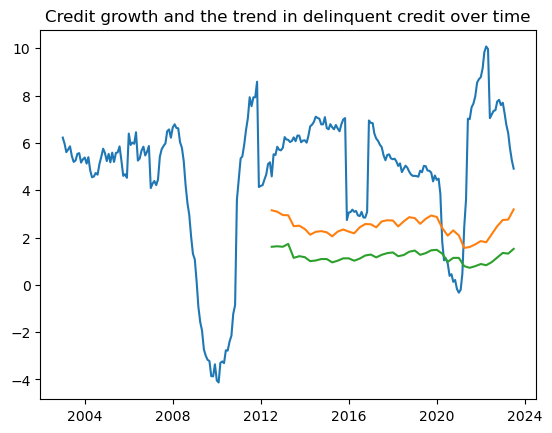

In [374]:
plt.plot(merged_df['date'], merged_df['credit_yoy'], label='credit growth yoy%')
plt.plot(merged_df['date'], merged_df['cc_bals_30d_due_percentage'], label='30 days due %')
plt.plot(merged_df['date'], merged_df['cc_bals_90d_due_percentage'], label='90 days due %')

plt.title ('Credit growth and the trend in delinquent credit over time')

In [375]:
merged_df['bad_CC_credit'] = merged_df['Credit Card_y'] * (merged_df['cc_bals_30d_due_percentage']*0.01)

In [376]:
merged_df['good_CC_credit'] = merged_df['Credit Card_y'] - merged_df['bad_CC_credit']

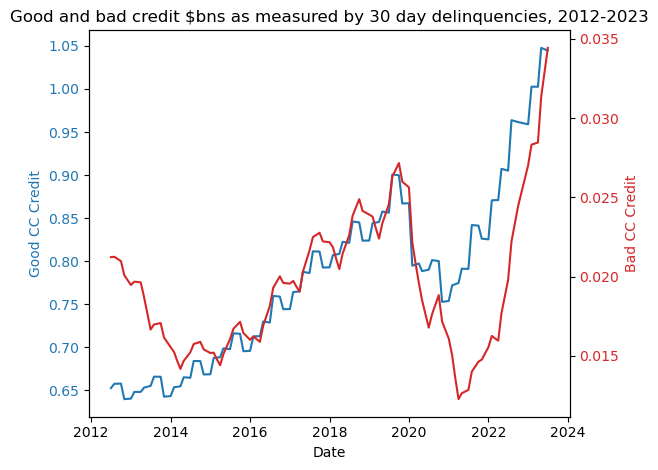

<Figure size 640x480 with 0 Axes>

In [426]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Good CC Credit', color=color)
ax1.plot(merged_df['date'], merged_df['good_CC_credit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Bad CC Credit', color=color)  
ax2.plot(merged_df['date'], merged_df['bad_CC_credit'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Good and bad credit $bns as measured by 30 day delinquencies, 2012-2023')

fig.tight_layout() 
plt.show()

plt.savefig('images/good_bad_credit.png');

In [378]:
merged_df['good_CC_credit_yoy'] = 100*(merged_df['good_CC_credit'] - merged_df['good_CC_credit'].shift(12)) / merged_df['good_CC_credit'].shift(12)
merged_df['good_CC_credit_yoy'] = merged_df['good_CC_credit_yoy'].fillna(0)



In [379]:
merged_df['bad_CC_credit_yoy'] = 100*(merged_df['bad_CC_credit'] - merged_df['bad_CC_credit'].shift(12)) / merged_df['bad_CC_credit'].shift(12)
merged_df['bad_CC_credit_yoy'] = merged_df['bad_CC_credit_yoy'].fillna(0)


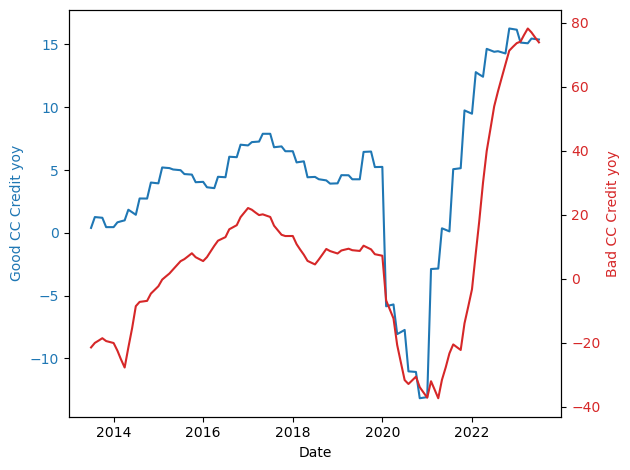

In [380]:
mask_df = merged_df[126:]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Good CC Credit yoy', color=color)
ax1.plot(mask_df['date'], mask_df['good_CC_credit_yoy'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Bad CC Credit yoy', color=color)  
ax2.plot(mask_df['date'], mask_df['bad_CC_credit_yoy'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

### Overall, we can see that delinquencies tend to grow during times of credit, with something of a lag and so it is very difficult, if not impossible to identify periods of 'good' credit growth.

### With more work we could analyse the profitability of these periods, even factoring in higher charge offs, factoring in higher rates as is currently the case. 

### With that analysis, we could decide where the cut off point would be, in terms of deciding what would be profitable lending, on a case by cas, or perhaps group by group basis. This would probably be an interetsing use case for k-means clustering, or DB-SCAN, if we had customer level data.

In [ ]:
#merged_df.to_csv('data/Master_data.csv')